In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------------------
# STEP 2: Load and preprocess the MNIST dataset
# --------------------------------------------------------------

# The MNIST dataset contains 70,000 grayscale images (28x28 pixels)
# Each image represents a handwritten digit from 0 to 9
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from [0, 255] to [0, 1] for faster training
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include a single channel (for grayscale images)
# CNNs expect input in the format (height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("✅ Training data shape:", x_train.shape)
print("✅ Testing data shape:", x_test.shape)
print()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
✅ Training data shape: (60000, 28, 28, 1)
✅ Testing data shape: (10000, 28, 28, 1)



In [3]:
# --------------------------------------------------------------
# STEP 3: Build the Convolutional Neural Network (CNN)
# --------------------------------------------------------------

# CNN layers help extract image features (edges, curves, patterns)
# Dense layers perform the final classification into digit classes
model = models.Sequential([
    # First convolutional layer with 32 filters of size 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Downsample using MaxPooling to reduce computation
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D output into a 1D vector
    layers.Flatten(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (one for each digit 0–9)
    layers.Dense(10, activation='softmax')
])

# Display a summary of the model architecture
model.summary()


c:\Users\BB\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# --------------------------------------------------------------
# STEP 4: Compile the model
# --------------------------------------------------------------

# Optimizer: 'adam' - adjusts weights efficiently
# Loss: 'sparse_categorical_crossentropy' - used for multi-class classification
# Metrics: 'accuracy' - to monitor model performance
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# --------------------------------------------------------------
# STEP 5: Train the CNN model
# --------------------------------------------------------------

# Fit the model on the training data for 5 epochs
# Validation data helps monitor test performance after each epoch
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9447 - loss: 0.1879 - val_accuracy: 0.9837 - val_loss: 0.0516
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9837 - loss: 0.0545 - val_accuracy: 0.9823 - val_loss: 0.0533
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9885 - val_loss: 0.0374
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9913 - val_loss: 0.0288
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9891 - val_loss: 0.0315


In [6]:
# --------------------------------------------------------------
# STEP 6: Evaluate the model on the test data
# --------------------------------------------------------------

# Evaluate accuracy and loss on the unseen test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}\n")


313/313 - 2s - 5ms/step - accuracy: 0.9891 - loss: 0.0315

✅ Test accuracy: 98.91%
Test loss: 0.0315



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


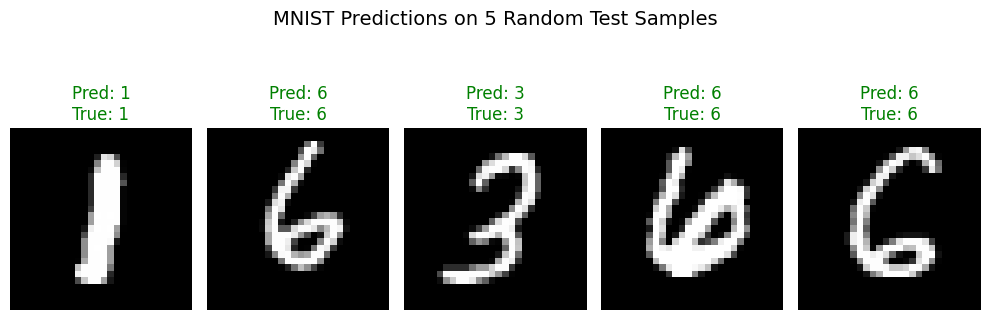

In [7]:
# --------------------------------------------------------------
# STEP 7: Visualize predictions on 5 sample images
# --------------------------------------------------------------

# Select 5 random images from the test set
indices = np.random.choice(len(x_test), 5)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Predict the digit for each image
predictions = model.predict(sample_images)

# Plot each image with predicted and true labels
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    pred_label = np.argmax(predictions[i])  # Highest probability digit
    true_label = sample_labels[i]
    
    # Green if correct, red if incorrect
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.suptitle("MNIST Predictions on 5 Random Test Samples", fontsize=14)
plt.tight_layout()
plt.show()